# COLD START MODEL

In [2]:
import pandas as pd
import numpy as np
import json
import sqlite3
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
db_path = "vectors.db"
connection = sqlite3.connect(db_path)
table_name = "users"
user_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
connection.close()

In [4]:
user_df.head()

,id,username,bio,post_count,follower_count,following_count,last_login
0,1,afrobeezy,b'\xb7\xf8\x18\xbdE{~<\xd0\t\xbf\xbc\x99\x1f\x...,0.054393,0.3125,0.2,2025-01-16 17:54:54
1,2,doey,b'\x98a\xf3\xbd\xdd\xd4E=\x8e\xfd&\xbb1h4\xbcU...,0.000000,0.0000,0.0,1970-01-01 00:00:00
2,3,doeyy,b'\x98a\xf3\xbd\xdd\xd4E=\x8e\xfd&\xbb1h4\xbcU...,0.000000,0.0000,0.0,1970-01-01 00:00:00
3,4,doeyyy,b'\x98a\xf3\xbd\xdd\xd4E=\x8e\xfd&\xbb1h4\xbcU...,0.000000,0.0000,0.0,1970-01-01 00:00:00
4,5,kinha,b'\xe2\xf6\xcd\xbcj\x8dP\xbdE\xa5V=\xda\xd8\x8...,1.000000,1.0000,1.0,2025-01-14 20:43:50


In [5]:
db_path = "vectors.db"
connection = sqlite3.connect(db_path)
table_name = "posts"
posts_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
connection.close()

In [6]:
posts_df['vector'] = posts_df['vector'].apply(lambda x: np.frombuffer(x, dtype=np.float32))

In [7]:
posts_df.head()

,id,vector,category_id,category_name,title,upvote_count,view_count,exit_count,rating_count,average_rating,username,upvoted,bookmarked,emotions
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",2,Vible,why fit in,0.421569,0.093700,0.000000,0.045455,0.357143,afrobeezy,0,0,"Anger, Determination, Pain, Empowerment, Isola..."
1,13,"[-0.02623921, -0.016178677, 0.0584833, -0.0476...",2,Vible,transcending singularity,0.196078,0.121163,0.000000,0.681818,0.091837,afrobeezy,0,0,None
2,14,"[0.029540151, 0.005941125, 0.017277755, -0.061...",2,Vible,peak performance,0.696078,0.153473,0.011215,0.090909,0.295918,afrobeezy,0,0,None
3,15,"[-0.008260611, 0.05746867, 0.044171125, -0.047...",2,Vible,our existential situation,0.627451,0.119548,0.000000,0.136364,0.336735,afrobeezy,0,0,None
4,16,"[-0.0042227353, 0.028556699, -0.027887717, 0.0...",2,Vible,act now,0.441176,0.111470,0.003738,0.166667,0.244898,afrobeezy,0,0,None


In [8]:
posts_df.shape

(1273, 14)

In [9]:
db_path = "vectors.db"
connection = sqlite3.connect(db_path)
table_name = "liked"
liked_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
connection.close()

In [10]:
liked_df.head()

,id,post_id,user_id,liked_at
0,3,33,9,2023-10-26 09:08:32
1,5,36,1,2023-10-28 09:08:35
2,7,36,16,2023-10-28 09:15:57
3,9,52,9,2023-10-30 15:48:46
4,15,50,19,2023-11-01 11:37:04


In [11]:
db_path = "vectors.db"
connection = sqlite3.connect(db_path)
table_name = "viewed"
viewed_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
connection.close()

In [12]:
viewed_df.head()

,id,post_id,user_id,viewed_at
0,10726,1346,5,2024-11-24 20:26:04
1,10739,1357,5,2024-11-24 20:30:47
2,10851,1365,5,2024-11-29 19:09:20
3,10914,1342,5,2024-12-02 09:23:34
4,10917,1367,5,2024-12-02 09:23:50


In [13]:
db_path = "vectors.db"
connection = sqlite3.connect(db_path)
table_name = "rated"
rated_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
connection.close()

In [14]:
rated_df.head()

,id,post_id,user_id,rating_percent,rated_at
0,1,516,1,64,2024-01-11 12:45:41
1,2,160,1,62,2024-01-11 12:47:15
2,3,19,1,20,2024-01-11 12:47:28
3,4,148,1,100,2024-01-11 12:49:35
4,5,513,1,63,2024-01-11 12:50:58


In [15]:
db_path = "vectors.db"
connection = sqlite3.connect(db_path)
table_name = "inspired"
inspired_df = pd.read_sql_query(f"SELECT * FROM {table_name}", connection)
connection.close()

In [16]:
inspired_df.head()

,id,post_id,user_id,inspired_at
0,1,588,1,2023-12-31 09:06:27
1,2,152,1,2023-12-31 09:07:32
2,3,415,1,2023-12-31 09:10:09
3,4,558,1,2023-12-31 09:11:23
4,5,549,1,2023-12-31 09:11:28


# Arrange Posts and Users
 In Clusters

In [17]:
vector_shape = posts_df['vector'].iloc[0].shape
print(vector_shape)

(384,)


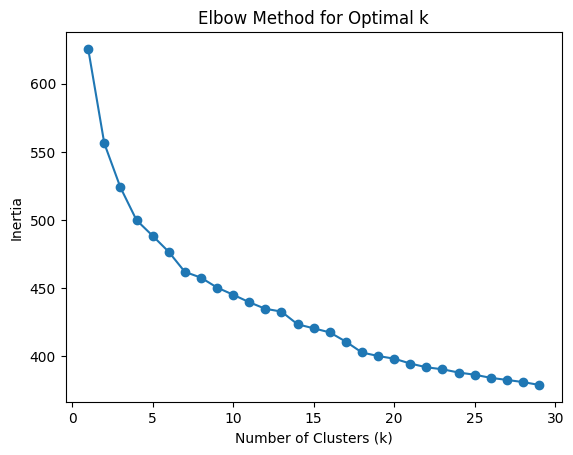

In [18]:
vectors = np.vstack(posts_df['vector'])

inertia_values = [] #The sum of distances between data points and their cluster centers.
k_values = range(1, 30)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectors)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [19]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
posts_df['cluster_label'] = kmeans.fit_predict(np.vstack(posts_df['vector']))

In [20]:
# Count the number of points in each cluster
cluster_counts = posts_df['cluster_label'].value_counts()

print("Number of points in each cluster:")
print(cluster_counts)


Number of points in each cluster:
cluster_label
3    317
1    311
0    309
4    226
2    110
Name: count, dtype: int64


In [21]:
print(posts_df[['id', 'cluster_label']].head())

   id  cluster_label
0  12              3
1  13              1
2  14              1
3  15              1
4  16              2


In [22]:
posts_df.head()

,id,vector,category_id,category_name,title,upvote_count,view_count,exit_count,rating_count,average_rating,username,upvoted,bookmarked,emotions,cluster_label
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",2,Vible,why fit in,0.421569,0.093700,0.000000,0.045455,0.357143,afrobeezy,0,0,"Anger, Determination, Pain, Empowerment, Isola...",3
1,13,"[-0.02623921, -0.016178677, 0.0584833, -0.0476...",2,Vible,transcending singularity,0.196078,0.121163,0.000000,0.681818,0.091837,afrobeezy,0,0,None,1
2,14,"[0.029540151, 0.005941125, 0.017277755, -0.061...",2,Vible,peak performance,0.696078,0.153473,0.011215,0.090909,0.295918,afrobeezy,0,0,None,1
3,15,"[-0.008260611, 0.05746867, 0.044171125, -0.047...",2,Vible,our existential situation,0.627451,0.119548,0.000000,0.136364,0.336735,afrobeezy,0,0,None,1
4,16,"[-0.0042227353, 0.028556699, -0.027887717, 0.0...",2,Vible,act now,0.441176,0.111470,0.003738,0.166667,0.244898,afrobeezy,0,0,None,2


In [23]:
posts_df['cluster_label'].nunique()

5

map user cluster to post cluster using their interactions type

In [24]:
user_interactions = (
    viewed_df[['post_id', 'user_id', 'viewed_at']].merge(liked_df[['post_id', 'user_id', 'liked_at']], on=['user_id', 'post_id'], how='outer')
    .merge(inspired_df[['post_id', 'user_id', 'inspired_at']], on=['user_id', 'post_id'], how='outer')
    .merge(rated_df[['post_id', 'user_id', 'rating_percent','rated_at']], on=['user_id', 'post_id'], how='outer')
)
user_interactions = user_interactions.reset_index(drop=True)

user_interactions = user_interactions.drop_duplicates(subset=['post_id', 'user_id'], keep='first')

In [25]:
user_interactions.head()

,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at
0,12,1,2024-12-30 19:42:47,2024-03-22 11:52:39,NaN,74.0,2024-12-30 19:42:47
1,13,1,NaN,NaN,NaN,82.0,2024-04-17 17:10:04
2,14,1,NaN,2024-03-24 09:08:47,2024-01-05 13:50:52,62.0,2024-01-16 12:14:50
3,15,1,2024-12-29 15:53:35,2023-12-19 10:30:25,NaN,48.0,2024-04-17 17:10:28
4,16,1,2024-12-30 19:42:33,2024-01-16 15:33:01,NaN,51.0,2024-01-16 15:33:08


In [26]:
user_interactions.to_csv('timestamp_interactions.csv')

In [27]:
user_interactions['viewed_at'] = user_interactions['viewed_at'].apply(lambda x: 1 if pd.notna(x) else 0)
user_interactions['liked_at'] = user_interactions['liked_at'].apply(lambda x: 1 if pd.notna(x) else 0)
user_interactions['inspired_at'] = user_interactions['inspired_at'].apply(lambda x:1 if pd.notna(x) else 0)
user_interactions['rating_percent'] = user_interactions['rating_percent']/100
user_interactions['rated_at'] = user_interactions['rated_at'].apply(lambda x:1 if pd.notna(x) else 0)

In [28]:
user_interactions.head()

,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at
0,12,1,1,1,0,0.74,1
1,13,1,0,0,0,0.82,1
2,14,1,0,1,1,0.62,1
3,15,1,1,1,0,0.48,1
4,16,1,1,1,0,0.51,1


In [29]:
posts_df['id'] = posts_df['id'].astype(int)
user_interactions['post_id'] = user_interactions['post_id'].astype(int)
merged_df = posts_df.merge(user_interactions, left_on='id', right_on='post_id')

In [30]:
merged_df.tail()

,id,vector,category_id,category_name,title,upvote_count,view_count,exit_count,rating_count,average_rating,...,bookmarked,emotions,cluster_label,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at
7449,2867,"[-0.0028067012, 0.033715148, 0.07682123, 0.026...",8,Bloom Scroll,energized by dreams,0.029412,0.300485,0.239252,0.000000,0.816327,...,0,None,4,2867,1425,1,0,0,NaN,0
7450,2868,"[-0.017319024, -0.0459584, 0.034370076, 0.0256...",8,Bloom Scroll,the curious journey within,0.049020,0.313409,0.306542,0.015152,0.193878,...,0,None,4,2868,1557,1,0,0,0.19,1
7451,2869,"[-0.017842768, -0.0038583914, 0.027653549, -0....",8,Bloom Scroll,the dance of confusion,0.078431,0.256866,0.229907,0.015152,0.234694,...,0,None,4,2869,1557,1,0,0,0.23,1
7452,2870,"[0.024981972, 0.008476599, -0.0046720244, -0.0...",8,Bloom Scroll,the mystery of the lost key,0.058824,0.308562,0.315888,0.000000,0.806122,...,0,None,4,2870,1425,1,0,0,NaN,0
7453,2870,"[0.024981972, 0.008476599, -0.0046720244, -0.0...",8,Bloom Scroll,the mystery of the lost key,0.058824,0.308562,0.315888,0.000000,0.806122,...,0,None,4,2870,1557,1,0,0,NaN,0


In [31]:
merged_df.columns

Index(['id', 'vector', 'category_id', 'category_name', 'title', 'upvote_count',
       'view_count', 'exit_count', 'rating_count', 'average_rating',
       'username', 'upvoted', 'bookmarked', 'emotions', 'cluster_label',
       'post_id', 'user_id', 'viewed_at', 'liked_at', 'inspired_at',
       'rating_percent', 'rated_at'],
      dtype='object')

In [32]:
merged_df = merged_df.drop(['category_id', 'upvote_count',
       'view_count', 'exit_count', 'rating_count', 'average_rating',
       'username', 'upvoted', 'bookmarked', 'emotions'], axis=1)

In [33]:
merged_df.head()

,id,vector,category_name,title,cluster_label,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1,1,1,0,0.74,1
1,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,5,1,0,0,NaN,0
2,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,36,0,1,0,NaN,0
3,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,203,1,1,0,0.20,1
4,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1105,1,0,0,0.13,1


In [34]:
merged_df['interacted_with_cluster'] = merged_df['cluster_label'].apply(lambda x: 1 if x != 0 else 0)

user_cluster_interaction = merged_df.groupby('user_id')['cluster_label'].unique().apply(lambda x: [1 if i in x else 0 for i in range(n_clusters)])

# Convert list of interactions into a DataFrame
user_matrix = pd.DataFrame(list(user_cluster_interaction), index=user_cluster_interaction.index)

In [35]:
user_matrix.shape

(700, 5)

In [36]:
user_matrix

,0,1,2,3,4
user_id,,,,,
1,1,1,1,1,1
5,1,1,1,1,1
9,1,1,1,1,1
16,0,1,1,1,1
18,1,1,1,1,1
...,...,...,...,...,...
1562,0,1,1,1,1
1563,0,1,0,1,0
1564,0,1,0,1,1


In [37]:
merged_df.head()

,id,vector,category_name,title,cluster_label,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at,interacted_with_cluster
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1,1,1,0,0.74,1,1
1,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,5,1,0,0,NaN,0,1
2,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,36,0,1,0,NaN,0,1
3,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,203,1,1,0,0.20,1,1
4,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1105,1,0,0,0.13,1,1


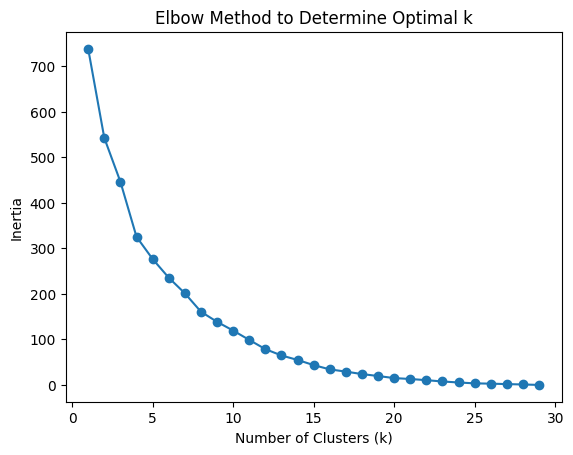

In [38]:
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_matrix)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

k_values = range(1, 15)

In [39]:
n_user_clusters = 4
user_kmeans = KMeans(n_clusters=n_user_clusters, random_state=42)
user_cluster_labels = user_kmeans.fit_predict(user_matrix)
user_matrix['user_cluster'] = user_cluster_labels
user_matrix.reset_index(inplace=True)

print("User clustering based on post interactions completed successfully.")

User clustering based on post interactions completed successfully.


In [40]:
# Count the number of points in each cluster
cluster_counts = user_matrix['user_cluster'].value_counts()

print("Number of points in each cluster:")
print(cluster_counts)


Number of points in each cluster:
user_cluster
0    244
1    181
2    149
3    126
Name: count, dtype: int64


In [41]:
user_matrix['user_cluster'].nunique()

4

In [42]:
user_matrix.head()

,user_id,0,1,2,3,4,user_cluster
0,1,1,1,1,1,1,3
1,5,1,1,1,1,1,3
2,9,1,1,1,1,1,3
3,16,0,1,1,1,1,3
4,18,1,1,1,1,1,3


In [43]:
merged_df.head()

,id,vector,category_name,title,cluster_label,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at,interacted_with_cluster
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1,1,1,0,0.74,1,1
1,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,5,1,0,0,NaN,0,1
2,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,36,0,1,0,NaN,0,1
3,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,203,1,1,0,0.20,1,1
4,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1105,1,0,0,0.13,1,1


In [44]:
merged_df['rating_percent'] = merged_df['rating_percent'].fillna(0)
merged_df['weighted_score'] = (
    0.4 * merged_df['liked_at'] +
    0.2 * merged_df['inspired_at'] +
    0.4 * merged_df['rating_percent']
)


since now we have seen how user interacts with posts and found their cluster it is not a new user anymore so we will now you use content based filtering/collaborative filtering/hybrid based filtering to recommend posts

# 1. Collabortive filtering

In [45]:
merged_df.head()

,id,vector,category_name,title,cluster_label,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at,interacted_with_cluster,weighted_score
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1,1,1,0,0.74,1,1,0.696
1,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,5,1,0,0,0.00,0,1,0.000
2,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,36,0,1,0,0.00,0,1,0.400
3,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,203,1,1,0,0.20,1,1,0.480
4,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1105,1,0,0,0.13,1,1,0.052


In [46]:
merged_df.columns

Index(['id', 'vector', 'category_name', 'title', 'cluster_label', 'post_id',
       'user_id', 'viewed_at', 'liked_at', 'inspired_at', 'rating_percent',
       'rated_at', 'interacted_with_cluster', 'weighted_score'],
      dtype='object')

In [47]:
f = merged_df[merged_df['post_id'] == 12]
f

,id,vector,category_name,title,cluster_label,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at,interacted_with_cluster,weighted_score
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1,1,1,0,0.74,1,1,0.696
1,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,5,1,0,0,0.00,0,1,0.000
2,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,36,0,1,0,0.00,0,1,0.400
3,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,203,1,1,0,0.20,1,1,0.480
4,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",Vible,why fit in,3,12,1105,1,0,0,0.13,1,1,0.052


In [48]:
# Step 1: Aggregate weighted_score by post_id
aggregated_scores = merged_df.groupby('post_id', as_index=False).agg({'weighted_score': 'max'})

# Step 2: Merge aggregated scores into posts_df
posts_df = posts_df.merge(
    aggregated_scores,
    how='left',
    left_on='id',
    right_on='post_id'
)

# Step 3: Drop the extra post_id column (optional)
posts_df = posts_df.drop(columns=['post_id'])

In [49]:
posts_df.head()

,id,vector,category_id,category_name,title,upvote_count,view_count,exit_count,rating_count,average_rating,username,upvoted,bookmarked,emotions,cluster_label,weighted_score
0,12,"[-0.0050623403, -4.739753e-05, 0.03801688, 0.0...",2,Vible,why fit in,0.421569,0.093700,0.000000,0.045455,0.357143,afrobeezy,0,0,"Anger, Determination, Pain, Empowerment, Isola...",3,0.696
1,13,"[-0.02623921, -0.016178677, 0.0584833, -0.0476...",2,Vible,transcending singularity,0.196078,0.121163,0.000000,0.681818,0.091837,afrobeezy,0,0,None,1,0.368
2,14,"[0.029540151, 0.005941125, 0.017277755, -0.061...",2,Vible,peak performance,0.696078,0.153473,0.011215,0.090909,0.295918,afrobeezy,0,0,None,1,0.848
3,15,"[-0.008260611, 0.05746867, 0.044171125, -0.047...",2,Vible,our existential situation,0.627451,0.119548,0.000000,0.136364,0.336735,afrobeezy,0,0,None,1,0.592
4,16,"[-0.0042227353, 0.028556699, -0.027887717, 0.0...",2,Vible,act now,0.441176,0.111470,0.003738,0.166667,0.244898,afrobeezy,0,0,None,2,0.604


In [50]:
liked_videos = merged_df[~merged_df['liked_at'].isnull()]
vectors = np.vstack(posts_df['vector'])
similarity_matrix = cosine_similarity(vectors)

In [51]:
similarity_matrix

array([[1.0000001 , 0.5983026 , 0.5454727 , ..., 0.48239812, 0.52918154,
        0.41467214],
       [0.5983026 , 1.        , 0.6100087 , ..., 0.5213992 , 0.614143  ,
        0.5715644 ],
       [0.5454727 , 0.6100087 , 1.0000002 , ..., 0.38893494, 0.5531582 ,
        0.39049044],
       ...,
       [0.48239812, 0.5213992 , 0.38893494, ..., 1.0000004 , 0.60109335,
        0.61346614],
       [0.52918154, 0.614143  , 0.5531582 , ..., 0.60109335, 0.99999994,
        0.64893097],
       [0.41467214, 0.5715644 , 0.39049044, ..., 0.61346614, 0.64893097,
        1.0000004 ]], dtype=float32)

In [52]:
user_interactions = pd.DataFrame(user_interactions)


In [53]:
user_interactions.to_csv('interaction.csv')

In [54]:
user_interactions.tail()

,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at
8682,2671,1566,1,0,0,NaN,0
8683,2696,1566,1,0,0,NaN,0
8684,2710,1566,1,0,0,NaN,0
8685,2764,1566,1,0,0,NaN,0
8686,2769,1566,1,0,0,NaN,0


In [55]:
def handle_new_user(user_id, merged_df, threshold=5, epsilon=0.3, num_recommendations=10):
    global user_interactions 

    total_interactions = 0
    assigned_clusters = set()
    dynamic_cluster_id = merged_df['cluster_label'].max() + 1  # Start dynamic cluster IDs
    seen_posts = set()
    interaction_history = []
    temp_interactions = []  # Temporary interactions for the new user

    if 'weighted_score' not in merged_df.columns:
        merged_df['rating_percent'] = merged_df['rating_percent'].fillna(0)
        merged_df['weighted_score'] = (
            0.4 * merged_df['liked_at'] +
            0.2 * merged_df['inspired_at'] +
            0.4 * merged_df['rating_percent']
        )

    print("Handling new user globally.")
    cluster_weighted_score = merged_df.groupby('cluster_label')['weighted_score'].mean()
    new_user_cluster = random.choice(merged_df['cluster_label'].unique())

    while total_interactions < threshold:
        print(f"\nUser {user_id} currently assigned to cluster {new_user_cluster}")
        assigned_clusters.add(new_user_cluster)
        interaction_history.append(new_user_cluster)

        # Recommend posts from the current cluster
        recomm_posts = merged_df[merged_df['cluster_label'] == new_user_cluster]

        print(f"Posts in cluster {new_user_cluster} before filtering seen posts: {len(recomm_posts)}")
        recomm_posts = recomm_posts[~recomm_posts['post_id'].isin(seen_posts)]
        print(f"Posts in cluster {new_user_cluster} after filtering seen posts: {len(recomm_posts)}")

        if recomm_posts.empty:
            print(f"No available posts left in cluster {new_user_cluster}.")
            break

        # Sample posts
        if len(recomm_posts) < num_recommendations:
            print(f"Not enough posts in cluster {new_user_cluster}. Recommending fewer posts.")
            selected_posts = recomm_posts
        else:
            selected_posts = recomm_posts.sample(n=num_recommendations)

        seen_posts.update(selected_posts['post_id'])

        # Simulate user feedback
        print("Did you like the following posts? Enter 1 if you liked, or 0 if you did not.")
        for _, row in selected_posts.iterrows():
            post_id = row['id']
            post_title = row['title']
            interaction = int(input(f"Did you like post '{post_title}' (ID: {post_id})? (1 for yes, 0 for no): "))
            temp_interactions.append({
                'user_id': user_id,
                'post_id': post_id,
                'liked': interaction,
                'category_name': "global"  # Label the interactions as global
            })

        total_interactions += sum([x['liked'] for x in temp_interactions if x['post_id'] in seen_posts])
        print(f"Total interactions for cluster {new_user_cluster}: {total_interactions}")

        if total_interactions >= threshold:
            print(f"\nUser {user_id}'s interactions have met the threshold in cluster {new_user_cluster}.")
            break

        print(f"Reassigning user {user_id} to a new cluster...")
        available_clusters = set(merged_df['cluster_label'].unique()) - assigned_clusters

        if not available_clusters:
            print(f"No available clusters left for reassignment. Assigning user {user_id} to a new dynamic cluster.")
            new_user_cluster = dynamic_cluster_id
            dynamic_cluster_id += 1
            break

        if random.random() < epsilon:
            new_user_cluster = random.choice(list(available_clusters))
            print(f"Exploration: User {user_id} reassigned to cluster {new_user_cluster}.")
        else:
            new_user_cluster = cluster_weighted_score[list(available_clusters)].idxmax()
            print(f"Exploitation: User {user_id} reassigned to cluster {new_user_cluster}.")

        total_interactions = 0

    # Merge temporary interactions back into user_interactions
    if temp_interactions:
        new_interactions_df = pd.DataFrame(temp_interactions)
        user_interactions = pd.concat([user_interactions, new_interactions_df], ignore_index=True)
        user_interactions.to_csv('timestamp_interactions.csv', index=False)  # Save persistently

    print(f"\nFinal cluster assignment for User {user_id}: {new_user_cluster}")
    print("Cluster assignment history:", interaction_history)

    return recomm_posts[['id', 'title', 'category_name', 'cluster_label']].head(num_recommendations)


In [56]:
user_interactions2 = pd.read_csv('timestamp_interactions.csv')

In [57]:
user_interactions2.tail()


,Unnamed: 0,post_id,user_id,viewed_at,liked_at,inspired_at,rating_percent,rated_at
8654,8682,2671,1566,2025-01-16 17:33:18,NaN,NaN,NaN,NaN
8655,8683,2696,1566,2025-01-16 17:33:17,NaN,NaN,NaN,NaN
8656,8684,2710,1566,2025-01-16 17:33:20,NaN,NaN,NaN,NaN
8657,8685,2764,1566,2025-01-16 17:33:08,NaN,NaN,NaN,NaN
8658,8686,2769,1566,2025-01-16 17:33:16,NaN,NaN,NaN,NaN


In [58]:
def recommend_posts1(username, num_recommendations=10, explore_fraction=0.3, threshold=5, epsilon=0.3):
    global user_interactions
    if not isinstance(user_interactions, pd.DataFrame):
        user_interactions = pd.DataFrame(user_interactions)
        print("Converted user_interactions to DataFrame.")

    # Ensure type consistency for user IDs
    user_df['id'] = user_df['id'].astype(str)
    user_interactions['user_id'] = user_interactions['user_id'].astype(str)

    # Drop duplicates in user_interactions to avoid duplicate entries
    user_interactions = user_interactions.drop_duplicates(subset=['user_id', 'post_id'])

    # Find user in user_df
    user = user_df[user_df['username'] == username]
    if user.empty:
        return f"User '{username}' not found."

    user_id = str(user.iloc[0]['id'])  # Ensure user_id is consistent with user_interactions
    print(f"user_id: {user_id}")

    # Check the number of interactions for the user
    user_interactions_count = user_interactions[user_interactions['user_id'] == user_id].shape[0]
    print(f"User interaction count: {user_interactions_count}")

    # If the user is new or has fewer than 5 interactions, handle as a new user
    if user_interactions_count < 5:
        print("User has fewer than 5 interactions. Handling as a new user.")
        return handle_new_user(user_id, merged_df, threshold, epsilon, num_recommendations)

    # Fetch user's most recent 15 interactions
    user_viewed_posts = (
        user_interactions[user_interactions['user_id'] == user_id]
        .sort_values(by='viewed_at', ascending=False)  # Use the most recent viewed_at timestamps
        .head(15)['post_id']  # Limit to the last 15 interactions
        .unique()
        .tolist()
    )
    print(f"user_viewed_posts: {user_viewed_posts}")

    if len(user_viewed_posts) == 0:
        print("No past interactions found for user. Treating as new.")
        return handle_new_user(user_id, merged_df, threshold, epsilon, num_recommendations)

    # Proceed with normal recommendation logic...
    user_clusters = posts_df[posts_df['id'].isin(user_viewed_posts)]['cluster_label'].value_counts()
    dominant_cluster = user_clusters.idxmax()

    user_vectors = posts_df[posts_df['id'].isin(user_viewed_posts)]['vector']
    user_vector = np.mean(np.vstack(user_vectors), axis=0)

    cluster_posts = posts_df[posts_df['cluster_label'] == dominant_cluster]
    cluster_vectors = np.vstack(cluster_posts['vector'])
    cluster_similarities = cosine_similarity([user_vector], cluster_vectors).flatten()

    cluster_posts = cluster_posts.assign(similarity=cluster_similarities)
    cluster_recommendations = cluster_posts.sort_values('similarity', ascending=False)
    cluster_recommendations = cluster_recommendations[~cluster_recommendations['id'].isin(user_viewed_posts)]

    other_clusters = posts_df[posts_df['cluster_label'] != dominant_cluster]
    other_vectors = np.vstack(other_clusters['vector'])
    other_similarities = cosine_similarity([user_vector], other_vectors).flatten()
    other_clusters = other_clusters.assign(similarity=other_similarities)
    other_recommendations = other_clusters.sort_values('similarity', ascending=False)

    n_cluster_recommendations = int(num_recommendations * (1 - explore_fraction))
    n_exploration_recommendations = num_recommendations - n_cluster_recommendations

    # Combine the recommendations
    final_recommendations = pd.concat([
        cluster_recommendations.head(n_cluster_recommendations),
        other_recommendations.head(n_exploration_recommendations)
    ])

    # Drop duplicates in final recommendations
    final_recommendations = final_recommendations.drop_duplicates(subset=['id'])

    # Shuffle the final recommendations to mix cluster-based and exploration-based posts
    final_recommendations = final_recommendations.sample(frac=1, random_state=42).reset_index(drop=True)

    return final_recommendations[['id', 'title', 'category_name', 'cluster_label']].head(num_recommendations)


In [59]:
recommendations = recommend_posts1(username='kinha', num_recommendations=10)
print(recommendations)

user_id: 5
User interaction count: 436
user_viewed_posts: [12, 1355, 1365, 1364, 1363, 1362, 1361, 1359, 1358, 1357, 1356, 1354, 1367, 1353, 1352]
     id                                              title category_name  \
0    38                                       meditate🧘‍♂️         Vible   
1  2758                                 embracing selflove  Bloom Scroll   
2  1343  nature is calling and i must go  nature moody ...  Bloom Scroll   
3  1383  charles’ essays on substack charleseisensteins...  Bloom Scroll   
4   207                                                            E/ACC   
5  2733                                 unstoppable growth  Bloom Scroll   
6  1356  the universe speaks frequency and responds to ...  Bloom Scroll   
7   148                                                            Vible   
8  1345  my favorite color is nature  ••feature by geor...  Bloom Scroll   
9  2675                                awakening potential  Bloom Scroll   

   cluster_label

# 2. Category based filtering1

In [60]:
def handle_new_user2(user_id, merged_df, threshold=5, num_recommendations=10, category=None):
    global user_interactions2

    total_liked_interactions = 0  # Total liked interactions in the current cluster
    seen_posts = set(user_interactions2[user_interactions2['user_id'] == user_id]['post_id'].tolist())  # Track seen posts
    assigned_clusters = set()  # Keep track of visited clusters
    temp_interactions = []  # Store temporary interactions for the new user

    if 'weighted_score' not in merged_df.columns:
        merged_df['rating_percent'] = merged_df['rating_percent'].fillna(0)
        merged_df['weighted_score'] = (
            0.4 * merged_df['liked_at'] +
            0.2 * merged_df['inspired_at'] +
            0.4 * merged_df['rating_percent']
        )

    # Filter posts by category if provided
    if category:
        category_posts = merged_df[merged_df['category_name'].str.lower() == category.lower()]
    else:
        category_posts = merged_df

    # Get the unique clusters for the filtered posts
    available_clusters = category_posts['cluster_label'].unique().tolist()

    if not available_clusters:
        print(f"No posts available in category '{category}' for recommendations.")
        return pd.DataFrame(), None

    new_user_cluster = random.choice(available_clusters)

    while total_liked_interactions < threshold:
        print(f"\nUser {user_id} currently assigned to cluster {new_user_cluster}")

        # Add the current cluster to the visited clusters
        assigned_clusters.add(new_user_cluster)

        # Filter posts for the current cluster and exclude seen posts
        recomm_posts = category_posts[category_posts['cluster_label'] == new_user_cluster]
        recomm_posts = recomm_posts[~recomm_posts['id'].isin(seen_posts)]  # Exclude seen posts

        if recomm_posts.empty:
            print(f"No posts left in cluster {new_user_cluster}. Moving to a new cluster.")
            # Move to a new cluster if the current one is exhausted
            remaining_clusters = [cluster for cluster in available_clusters if cluster not in assigned_clusters]
            if not remaining_clusters:
                print("No more clusters left to explore.")
                break
            new_user_cluster = random.choice(remaining_clusters)
            continue

        # Recommend posts
        num_to_recommend = min(num_recommendations - total_liked_interactions, len(recomm_posts))
        recommendations = recomm_posts.sample(n=num_to_recommend)

        # Ask for user feedback
        print("Did you like the following posts? Enter 1 if you liked, or 0 if you did not.")
        for _, row in recommendations.iterrows():
            post_id = row['id']
            post_title = row['title']
            cluster = row['cluster_label']
            seen_posts.add(post_id)  # Add to seen posts

            # Log the recommendation and ask for feedback
            interaction = int(input(f"Recommending post from cluster {cluster}: '{post_title}' (ID: {post_id})? (1 for yes, 0 for no): "))
            temp_interactions.append({
                'user_id': user_id,
                'post_id': post_id,
                'liked': interaction,
                'viewed_at': pd.Timestamp.now(),
                'cluster_label': cluster
            })

        # Update the liked interactions count
        total_liked_interactions += sum([x['liked'] for x in temp_interactions if x['cluster_label'] == new_user_cluster])
        print(f"Total liked interactions for cluster {new_user_cluster}: {total_liked_interactions}")

        # Check if the threshold is met
        if total_liked_interactions >= threshold:
            print(f"User {user_id}'s interactions have met the threshold in cluster {new_user_cluster}.")
            break

        # Move to a new cluster if the threshold is not met
        print(f"Reassigning user {user_id} to a new cluster...")
        remaining_clusters = [cluster for cluster in available_clusters if cluster not in assigned_clusters]
        if not remaining_clusters:
            print("No more clusters left to explore.")
            break
        new_user_cluster = random.choice(remaining_clusters)

    # Merge interactions back into global user_interactions2
    if temp_interactions:
        new_interactions_df = pd.DataFrame(temp_interactions)
        user_interactions2 = pd.concat([user_interactions2, new_interactions_df], ignore_index=True)
        user_interactions2.to_csv('timestamp_interactions.csv', index=False)  # Save persistently

    # Compute user vector from liked posts
    liked_posts = [x['post_id'] for x in temp_interactions if x['liked'] == 1]
    if liked_posts:
        liked_vectors = np.vstack(merged_df.loc[merged_df['id'].isin(liked_posts), 'vector'])
        user_vector = np.mean(liked_vectors, axis=0)
    else:
        user_vector = None

    print(f"\nFinal cluster assignment for User {user_id}: {new_user_cluster}")
    return pd.DataFrame(temp_interactions), user_vector

In [61]:
def recommend_posts_c(username, num_recommendations=10, threshold=5, category=None, user_vector=None):
    global posts_df, user_interactions2, user_df

    # Ensure user_interactions2 is a DataFrame
    if not isinstance(user_interactions2, pd.DataFrame):
        user_interactions2 = pd.DataFrame(user_interactions2)

    # Ensure consistent ID types
    user_df['id'] = user_df['id'].astype(str)
    user_interactions2['user_id'] = user_interactions2['user_id'].astype(str)

    # Drop duplicate interactions
    user_interactions2 = user_interactions2.drop_duplicates(subset=['user_id', 'post_id'])

    # Find the user
    user = user_df[user_df['username'] == username]
    if user.empty:
        return f"User '{username}' not found."

    user_id = str(user.iloc[0]['id'])
    user_interactions = user_interactions2[user_interactions2['user_id'] == user_id]
    user_interactions_count = user_interactions.shape[0]

    print(f"User interaction count: {user_interactions_count}")

    # Handle new users with fewer than the threshold interactions
    if user_interactions_count < threshold:
        print(f"User {username} is new (less than {threshold} interactions). Handling as a new user.")
        # Call handle_new_user2 and update interactions
        new_interactions, user_vector = handle_new_user2(user_id, merged_df, threshold, num_recommendations, category)
        if not new_interactions.empty:
            user_interactions2 = pd.concat([user_interactions2, new_interactions], ignore_index=True)
            user_interactions2.to_csv('timestamp_interactions.csv', index=False)  # Save persistently

    # Fetch user's most recent interactions if no user_vector provided
    if user_vector is None:
        user_viewed_posts = (
            user_interactions.sort_values(by='viewed_at', ascending=False)
            .head(15)['post_id']  # Limit to the last 15 interactions
            .tolist()
        )
        print(f"user_viewed_posts: {user_viewed_posts}")
        if not user_viewed_posts:
            return f"No interactions found for user '{username}'."  # Exit if no data

        # Compute user vector from past interactions
        user_vectors = posts_df[posts_df['id'].isin(user_viewed_posts)]['vector']
        if user_vectors.empty:
            return f"No vector data available for user interactions."
        user_vector = np.mean(np.vstack(user_vectors), axis=0)

    # Compute similarity across all posts in the category
    category_posts = posts_df if category is None else posts_df[posts_df['category_name'].str.lower() == category.lower()]
    post_vectors = np.vstack(category_posts['vector'])
    similarities = cosine_similarity([user_vector], post_vectors).flatten()

    # Assign similarity scores and sort posts
    category_posts = category_posts.assign(similarity=similarities)
    recommendations = category_posts.sort_values('similarity', ascending=False)

    # Exclude already viewed posts
    viewed_post_ids = user_interactions['post_id'].tolist()
    recommendations = recommendations[~recommendations['id'].isin(viewed_post_ids)]

    # Return top recommendations
    return recommendations[['id', 'title', 'category_name', 'cluster_label']].head(num_recommendations)

In [62]:
recommendations = recommend_posts_c(username='alpha', num_recommendations=10, category='SolTok')
print(recommendations)

User interaction count: 0
User alpha is new (less than 5 interactions). Handling as a new user.

User 10 currently assigned to cluster 3
Did you like the following posts? Enter 1 if you liked, or 0 if you did not.


ValueError: invalid literal for int() with base 10: ''